# Artificial Neural Network for XOR Classification

This notebook demonstrates the implementation of a simple Artificial Neural Network (ANN) to solve the XOR classification problem. The XOR problem is a classic non-linearly separable problem that requires a neural network to solve effectively.

## Problem Overview
The XOR (exclusive OR) function returns:
- 1 when inputs are different (1,0) or (0,1)
- 0 when inputs are the same (0,0) or (1,1)

We'll implement this using a neural network with:
- Input layer (2 neurons)
- Hidden layer (4 neurons)
- Output layer (1 neuron)


## 1. Setup and Imports

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## 2. Data Generation
The following function generates a 2D XOR-like dataset with points clustered around (1,1), (1,5), (5,1), and (5,5).
- Points around (1,1) and (5,5) belong to class 0
- Points around (1,5) and (5,1) belong to class 1

In [2]:
def generate_xor_data(n=20, test_ratio=0.2, random_seed=42):
    """
    Generate a 2D XOR-like dataset with two features.
    Points are generated around (1,1), (1,5), (5,1), and (5,5)
    with labels based on XOR logic (class 0 vs class 1).
    Return train_data, test_data as lists of (features, label).
    """
    random.seed(random_seed)
    data = []
    # (1,1) and (5,5) -> Class 0
    for _ in range(n):
        x = 1 + random.gauss(0, 0.5)
        y = 1 + random.gauss(0, 0.5)
        data.append(([x, y], 0))
        
        x = 5 + random.gauss(0, 0.5)
        y = 5 + random.gauss(0, 0.5)
        data.append(([x, y], 0))
    
    # (1,5) and (5,1) -> Class 1
    for _ in range(n):
        x = 1 + random.gauss(0, 0.5)
        y = 5 + random.gauss(0, 0.5)
        data.append(([x, y], 1))
        
        x = 5 + random.gauss(0, 0.5)
        y = 1 + random.gauss(0, 0.5)
        data.append(([x, y], 1))
    
    random.shuffle(data)
    split_idx = int(len(data) * (1-test_ratio))
    return data[:split_idx], data[split_idx:]

### 2.1 Generate and Prepare the Dataset

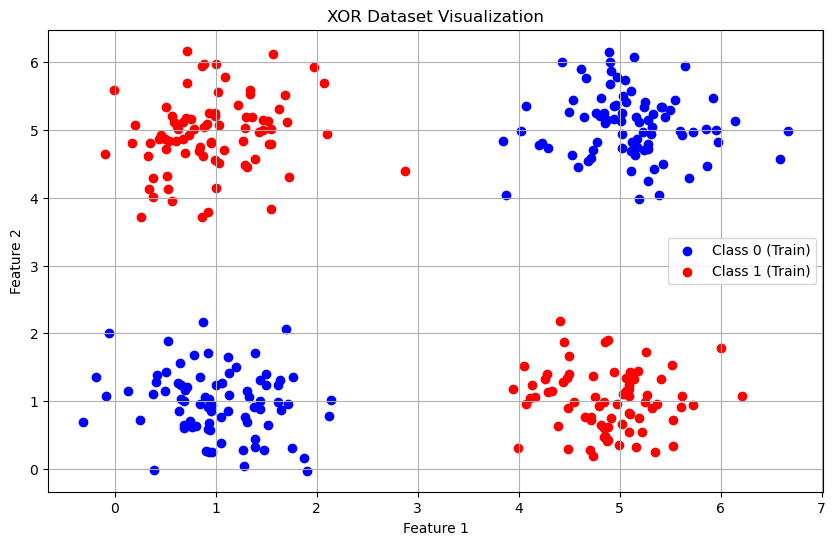

In [3]:
# Generate data
train_data, test_data = generate_xor_data(n=100, test_ratio=0.2)

# Prepare training data
X_train = np.array([p[0] for p in train_data])  # shape (N_train, 2)
y_train = np.array([p[1] for p in train_data])  # shape (N_train, )

# Prepare test data
X_test = np.array([p[0] for p in test_data])    # shape (N_test, 2)
y_test = np.array([p[1] for p in test_data])    # shape (N_test, )

# Reshape labels for matrix operations
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train.flatten() == 0][:, 0], X_train[y_train.flatten() == 0][:, 1], 
           c='blue', label='Class 0 (Train)')
plt.scatter(X_train[y_train.flatten() == 1][:, 0], X_train[y_train.flatten() == 1][:, 1], 
           c='red', label='Class 1 (Train)')
plt.title('XOR Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## 3. Neural Network Implementation

We'll implement a simple neural network with the following components:
1. Sigmoid activation function
2. Forward propagation
3. Backward propagation
4. Parameter updates using gradient descent

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 2
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 2
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        # First layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        # Output layer
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer
        dz1 = np.dot(dz2, self.W2.T) * sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update parameters
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    
    def train(self, X, y, epochs, learning_rate, verbose=True):
        losses = []
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Compute loss
            loss = -np.mean(y * np.log(output + 1e-8) + (1-y) * np.log(1-output + 1e-8))
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, learning_rate)
            
            if verbose and epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')
        
        return losses

## 4. Model Training

Epoch 0, Loss: 0.7562
Epoch 100, Loss: 0.6008
Epoch 200, Loss: 0.5779
Epoch 300, Loss: 0.5597
Epoch 400, Loss: 0.5476
Epoch 500, Loss: 0.5416
Epoch 600, Loss: 0.5380
Epoch 700, Loss: 0.5353
Epoch 800, Loss: 0.5328
Epoch 900, Loss: 0.5307
Epoch 1000, Loss: 0.5287
Epoch 1100, Loss: 0.5269
Epoch 1200, Loss: 0.5253
Epoch 1300, Loss: 0.5238
Epoch 1400, Loss: 0.5225
Epoch 1500, Loss: 0.5212
Epoch 1600, Loss: 0.5201
Epoch 1700, Loss: 0.5190
Epoch 1800, Loss: 0.5180
Epoch 1900, Loss: 0.5171


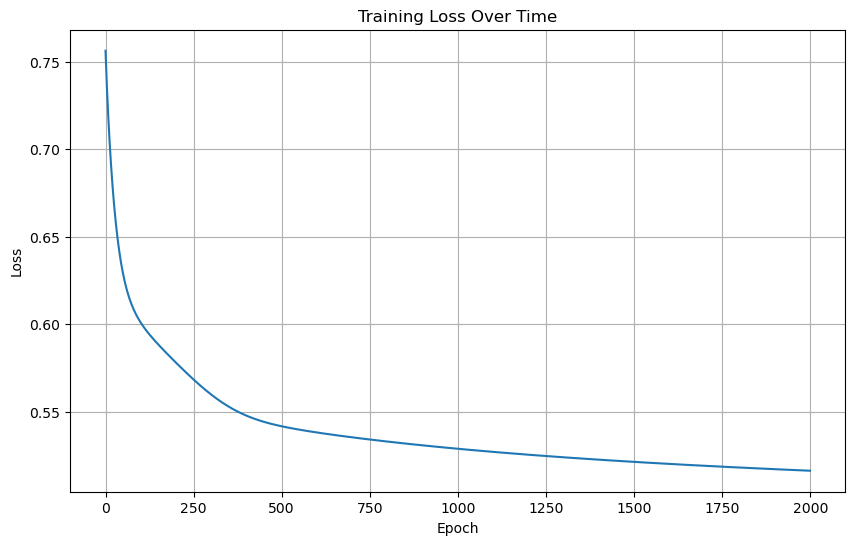

In [12]:
# Initialize and train the model
model = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)
losses = model.train(X_train, y_train, epochs=2000, learning_rate=0.05)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## 5. Model Evaluation

Training Accuracy: 0.5094
Test Accuracy: 0.4625


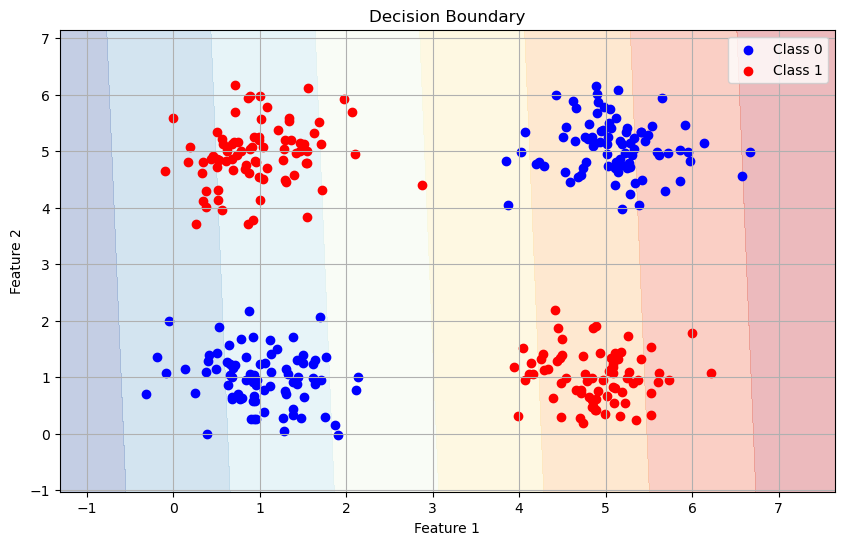

In [6]:
# Make predictions
y_pred_train = model.forward(X_train)
y_pred_test = model.forward(X_test)

# Convert probabilities to binary predictions
train_accuracy = np.mean((y_pred_train >= 0.5) == y_train)
test_accuracy = np.mean((y_pred_test >= 0.5) == y_test)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], 
               c='blue', label='Class 0')
    plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], 
               c='red', label='Class 1')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(model, X_train, y_train)